## EDA

In [1]:
#!pip install holidays
import numpy as np 
import pandas as pd 
#to plot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from pylab import rcParams
import seaborn as sns
#holidays
import holidays
#manejo de fechas
from datetime import datetime as dt
from datetime import timedelta
#locate and get the names of files
import os 
# libreria de modelos estadisticos
import statsmodels.api as sm

import warnings
warnings.filterwarnings( 'ignore' )



## cargar Data

In [2]:
aep = pd.read_csv( './data/AEP_hourly.csv', low_memory=False )
comed = pd.read_csv( './data/COMED_hourly.csv', low_memory=False )
dayton = pd.read_csv( './data/DAYTON_hourly.csv', low_memory=False )
deok = pd.read_csv( './data/DEOK_hourly.csv', low_memory=False )
dom = pd.read_csv( './data/DOM_hourly.csv', low_memory=False )
duq = pd.read_csv( './data/DUQ_hourly.csv', low_memory=False )
ekpc = pd.read_csv( './data/EKPC_hourly.csv', low_memory=False )
fe = pd.read_csv( './data/FE_hourly.csv', low_memory=False )
ni = pd.read_csv( './data/NI_hourly.csv', low_memory=False )
pjm = pd.read_csv( './data/PJM_Load_hourly.csv', low_memory=False )
pjme = pd.read_csv( './data/PJME_hourly.csv', low_memory=False )
pjmw = pd.read_csv( './data/PJMW_hourly.csv', low_memory=False )

In [3]:
pjmhe = pd.read_csv('./data/pjm_hourly_est.csv', low_memory=False)
pjmhe.head()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


In [4]:
pjmhe.describe()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,121273.000000,66497.000000,121275.000000,57739.000000,116189.000000,119068.000000,45334.000000,62874.000000,58450.000000,145366.000000,143206.000000,32896.000000
mean,15499.513717,11420.152112,2037.851140,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,29766.427408
std,2591.399065,2304.139517,393.403153,599.859026,2413.946569,301.740640,378.868404,1331.268006,2371.498701,6464.012166,979.142872,5849.769954
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,13630.000000,9780.000000,1749.000000,2687.000000,9322.000000,1444.000000,1185.000000,6807.000000,9954.000000,27573.000000,4907.000000,25473.000000
50%,15310.000000,11152.000000,2009.000000,3013.000000,10501.000000,1630.000000,1386.000000,7700.000000,11521.000000,31421.000000,5530.000000,29655.000000
75%,17200.000000,12510.000000,2279.000000,3449.000000,12378.000000,1819.000000,1699.000000,8556.000000,12896.750000,35650.000000,6252.000000,33073.250000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000


In [5]:
pjmhe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  178262 non-null  object 
 1   AEP       121273 non-null  float64
 2   COMED     66497 non-null   float64
 3   DAYTON    121275 non-null  float64
 4   DEOK      57739 non-null   float64
 5   DOM       116189 non-null  float64
 6   DUQ       119068 non-null  float64
 7   EKPC      45334 non-null   float64
 8   FE        62874 non-null   float64
 9   NI        58450 non-null   float64
 10  PJME      145366 non-null  float64
 11  PJMW      143206 non-null  float64
 12  PJM_Load  32896 non-null   float64
dtypes: float64(12), object(1)
memory usage: 17.7+ MB


In [6]:
pjmhe = pjmhe.fillna(0)
pjmhe['total'] = pjmhe['AEP']+pjmhe['COMED']+pjmhe['DAYTON']+pjmhe['DEOK']+pjmhe['DOM']+pjmhe['DUQ']+pjmhe['EKPC']+pjmhe['FE']+pjmhe['NI']+pjmhe['PJME']+pjmhe['PJMW']+pjmhe['AEP']+pjmhe['PJM_Load']
pjmhe

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load,total
0,1998-12-31 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29309.0,29309.0
1,1998-12-31 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28236.0,28236.0
2,1998-12-31 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27692.0,27692.0
3,1998-12-31 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27596.0,27596.0
4,1998-12-31 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27888.0,27888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,0.0,44284.0,8401.0,0.0,148503.0
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,0.0,43751.0,8373.0,0.0,147631.0
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,0.0,42402.0,8238.0,0.0,145051.0
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,0.0,40164.0,7958.0,0.0,140316.0


In [7]:
df_trabajo = pjmhe[['Datetime', 'total']]
df_trabajo.columns=['fecha', 'consumo_mw_total']
df_trabajo['fecha'] = pd.to_datetime(df_trabajo['fecha'])
df_trabajo.head()

,fecha,consumo_mw_total
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0


<AxesSubplot:xlabel='consumo_mw_total', ylabel='Density'>

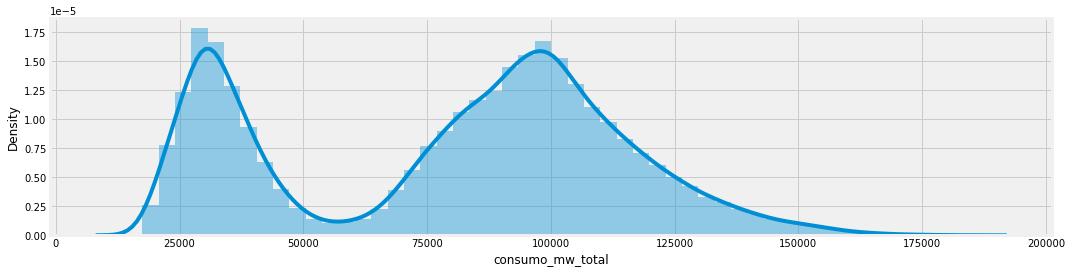

In [8]:
plt.figure(figsize=(16,4))
sns.distplot( df_trabajo['consumo_mw_total'] )

In [9]:
df_trabajo['year'] = df_trabajo['fecha'].dt.year
df_trabajo['month'] = df_trabajo['fecha'].dt.month
df_trabajo['day'] = df_trabajo['fecha'].dt.day
df_trabajo['hour'] = df_trabajo['fecha'].dt.hour
df_trabajo['week'] = df_trabajo['fecha'].dt.week


<AxesSubplot:xlabel='year', ylabel='consumo_mw_total'>

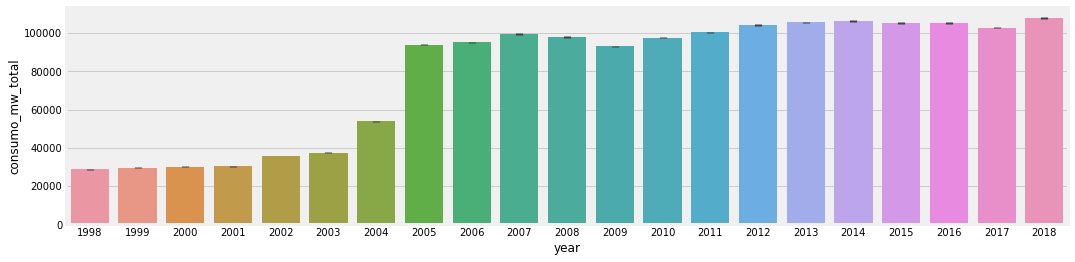

In [10]:
plt.figure(figsize=(16,4))
sns.barplot( x='year', y='consumo_mw_total', data=df_trabajo )


In [24]:
df_trabajo.loc[df_trabajo['year']==2004,'consumo_mw_total'].sum()/df_trabajo.loc[df_trabajo['year']==2005,'consumo_mw_total'].sum()

0.5736745807735608

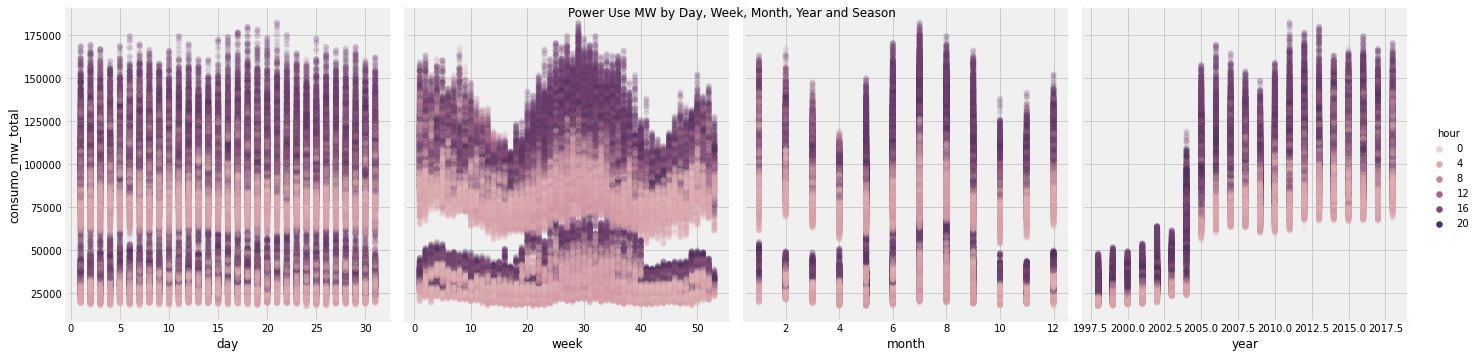

In [11]:
sns.pairplot(df_trabajo,
             hue='hour',
             x_vars=['day','week', 'month', 'year'],
             y_vars='consumo_mw_total',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Power Use MW by Day, Week, Month, Year and Season')
plt.show()

array([[<AxesSubplot:title={'center':'consumo_mw_total'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'week'}>]], dtype=object)

<Figure size 1440x360 with 0 Axes>

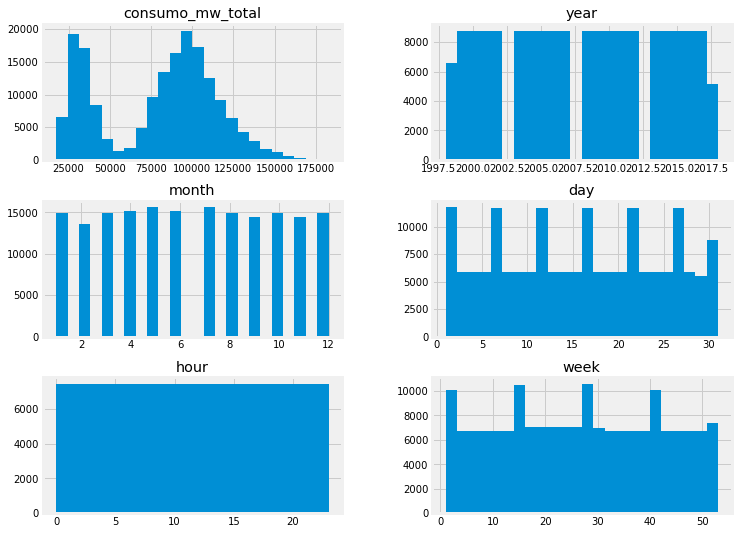

In [25]:
plt.figure(figsize=(20,5))
num_attributes = df_trabajo.select_dtypes( include=['int64', 'float64'] )
num_attributes.hist( bins=24 )


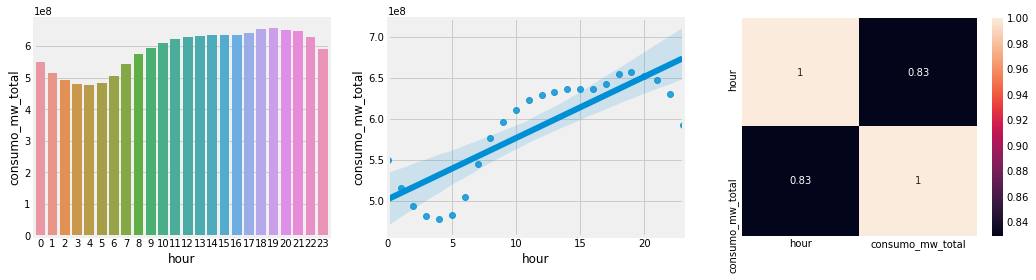

In [13]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
aux1 = df_trabajo[['hour', 'consumo_mw_total']].groupby( 'hour' ).sum().reset_index()
sns.barplot( x='hour', y='consumo_mw_total', data=aux1)

plt.subplot(1,3,2)
sns.regplot( x='hour', y='consumo_mw_total', data=aux1 )

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

<AxesSubplot:>

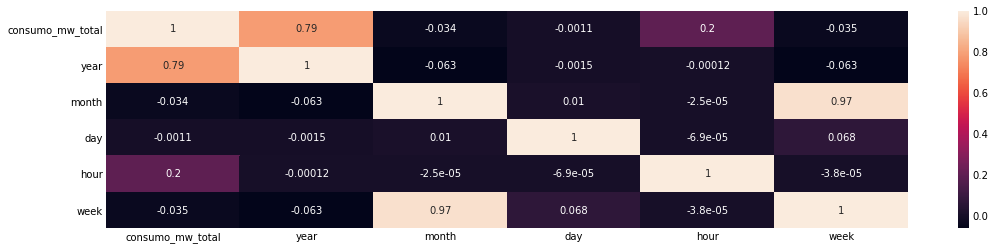

In [14]:
plt.figure(figsize=(16,4))
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True )

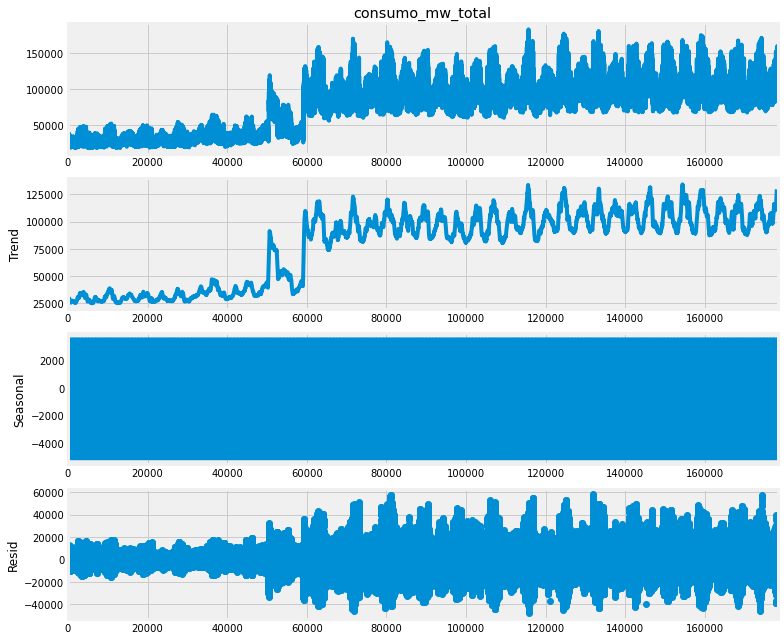

In [15]:
rcParams['figure.figsize'] = 11, 9
decomposed_df= sm.tsa.seasonal_decompose(df_trabajo['consumo_mw_total'],freq=360) # The frequncy is annual
figure = decomposed_df.plot()
plt.show()

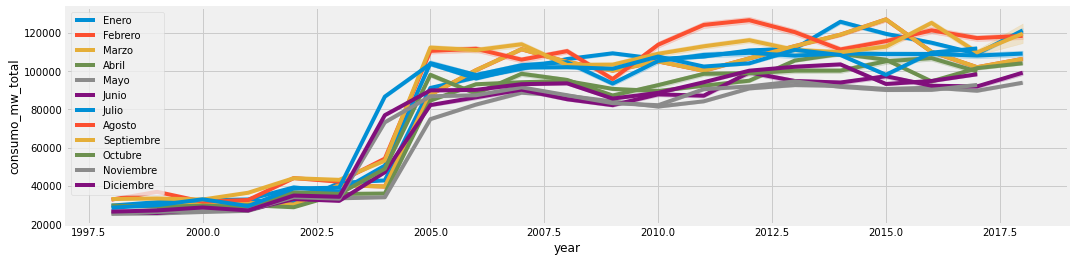

In [42]:
plt.figure(figsize=(16,4))
palette = sns.color_palette("mako_r", 6)
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==1] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==2] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==2] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==3] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==4] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==5] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==6] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==7] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==8] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==9] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==10] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==11] )
sns.lineplot( x='year', y='consumo_mw_total', data=df_trabajo.loc[df_trabajo['month']==12])
plt.legend(['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'])


In [3]:
aep['electric_company'] = 'AEP'
comed['electric_company'] = 'COMED'
dayton['electric_company'] = 'DAYTON'
deok['electric_company'] = 'DEOK'
dom['electric_company'] = 'DOM'
duq['electric_company'] = 'DUQ'
ekpc['electric_company'] = 'EKPC'
fe['electric_company'] = 'FE'
ni['electric_company'] = 'NI'
pjm['electric_company'] = 'PJM'
pjme['electric_company'] = 'PJME'
pjmw['electric_company'] = 'PJMW'

In [4]:
aep = aep.rename( columns={'AEP_MW': 'mw_energy_consumption'} )
comed = comed.rename( columns={'COMED_MW': 'mw_energy_consumption'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'mw_energy_consumption'} )
deok = deok.rename( columns={'DEOK_MW': 'mw_energy_consumption'} )
dom = dom.rename( columns={'DOM_MW': 'mw_energy_consumption'} )
duq = duq.rename( columns={'DUQ_MW': 'mw_energy_consumption'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'mw_energy_consumption'} )
fe = fe.rename( columns={'FE_MW': 'mw_energy_consumption'} )
ni = ni.rename( columns={'NI_MW': 'mw_energy_consumption'} )
pjm = pjm.rename( columns={'PJM_Load_MW': 'mw_energy_consumption'} )
pjme = pjme.rename( columns={'PJME_MW': 'mw_energy_consumption'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'mw_energy_consumption'} )

In [5]:
df_raw = pd.concat( [aep, comed, dayton, deok, dom, duq, ekpc, fe, ni, pjm, pjme, pjmw] )
df_raw.sample(5)

,Datetime,mw_energy_consumption,electric_company
88503,2015-07-28 09:00:00,12231.0,DOM
37835,2009-05-10 20:00:00,9986.0,DOM
27992,2005-07-24 16:00:00,6550.0,PJMW
61330,2018-03-06 17:00:00,7763.0,FE
88839,2014-02-11 14:00:00,18751.0,AEP


In [76]:
pjme.Datetime.min()

'2002-01-01 01:00:00'

In [6]:
df_raw.shape


(1090167, 3)

In [7]:
df1 = df_raw.copy()
cols_new = ['datetime', 'mw_energy_consumption', 'electric_company']
df1.columns = cols_new

Index(['Datetime', 'mw_energy_consumption', 'electric_company'], dtype='object')

In [10]:
df1['datetime'] = pd.to_datetime( df1['datetime'] )
df1.dtypes

datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
dtype: object

In [17]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

<AxesSubplot:xlabel='mw_energy_consumption', ylabel='Density'>

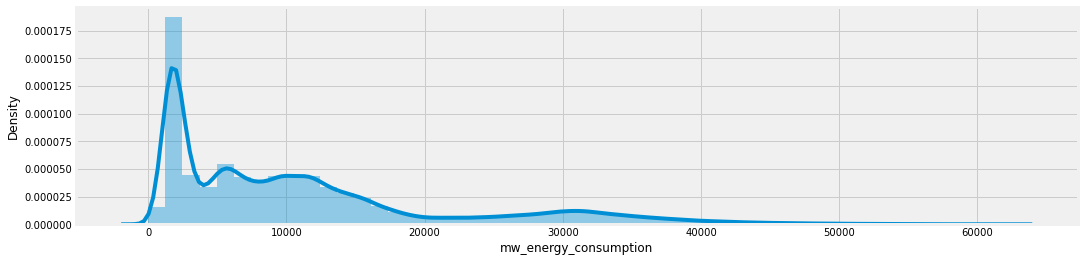

In [56]:
plt.figure(figsize=(16,4))
sns.distplot( df1['mw_energy_consumption'] )


<AxesSubplot:xlabel='electric_company', ylabel='mw_energy_consumption'>

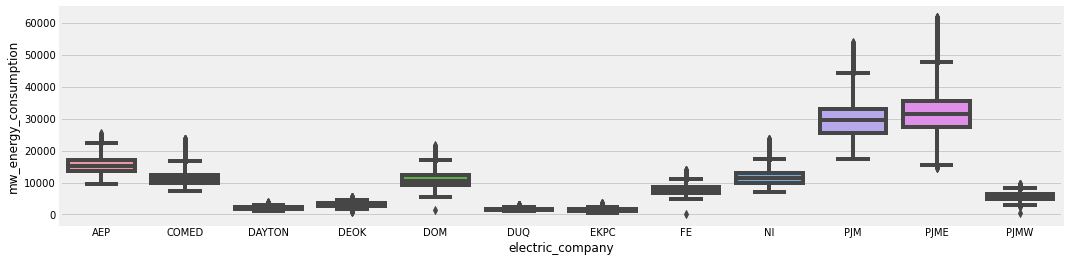

In [57]:
plt.figure(figsize=(16,4))
sns.boxplot( x= 'electric_company', y='mw_energy_consumption' , data=df1 )


## creacion de variables

### sera conveniente agregar quarter? df["quarter"] = df["datetime"].dt.quarter
### numero de semana tambien es una alternativa. df['week] = df['datetime].week


In [15]:
df2 = df1.copy()

df2['date'] = df2['datetime'].dt.date
df2['year'] = df2['datetime'].dt.year
df2['month'] = df2['datetime'].dt.month
df2['hour_of_day'] = df2['datetime'].dt.hour
df2['season'] = df2['datetime'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '')
df2['day_of_week'] = df2['datetime'].dt.weekday
df2['quarter'] = df2['datetime'].dt.quarter
df2['week'] =df2['datetime'].dt.week




In [16]:
df2['holidays'] = df2['datetime'].apply( lambda x: 'Holiday' if x in holidays.US() else 'Holiday' if x + timedelta(days=1) in holidays.US() else 'Normal day' )


In [18]:
df2.dtypes


datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
date                             object
year                              int64
month                             int64
hour_of_day                       int64
season                           object
day_of_week                       int64
quarter                           int64
week                              int64
holidays                         object
dtype: object

In [19]:
df2['date'] = pd.to_datetime( df2['date'] )


<AxesSubplot:xlabel='mw_energy_consumption', ylabel='Density'>

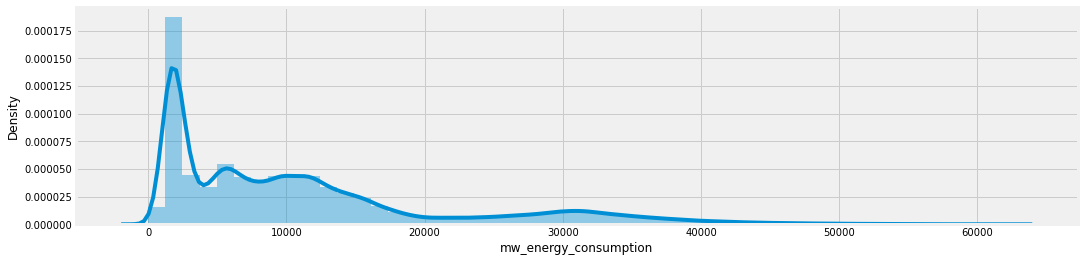

In [58]:
plt.figure(figsize=(16,4))
sns.distplot( df2['mw_energy_consumption'] )


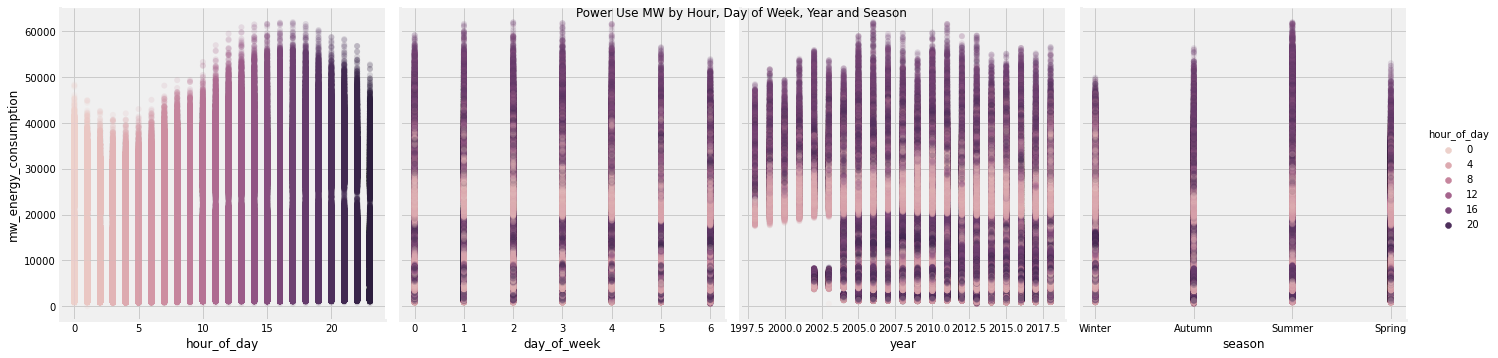

In [21]:
sns.pairplot(df2,
             hue='hour_of_day',
             x_vars=['hour_of_day','day_of_week',
                     'year','season'],
             y_vars='mw_energy_consumption',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Power Use MW by Hour, Day of Week, Year and Season')
plt.show()

array([[<AxesSubplot:title={'center':'mw_energy_consumption'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'hour_of_day'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'quarter'}>],
       [<AxesSubplot:title={'center':'week'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1152x288 with 0 Axes>

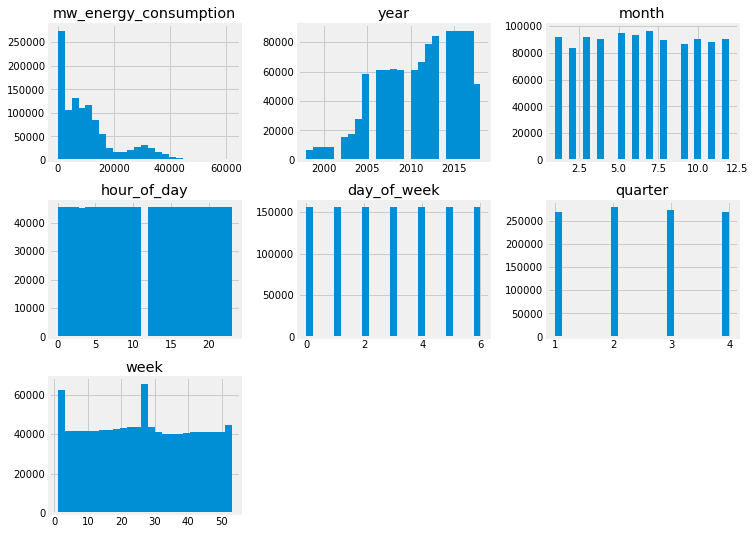

In [59]:
plt.figure(figsize=(16,4))
num_attributes = df2.select_dtypes( include=['int64', 'float64'] )
num_attributes.hist( bins=25 )


<AxesSubplot:xlabel='mw_energy_consumption', ylabel='Density'>

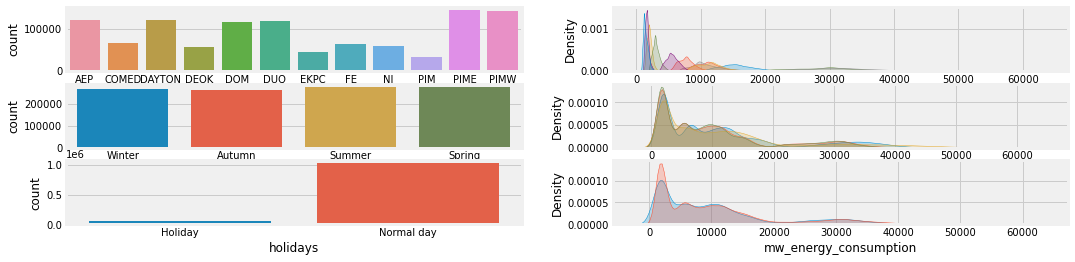

In [60]:
# electric_company
plt.figure(figsize=(16,4))

plt.subplot( 3, 2, 1)
sns.countplot( df2['electric_company'] )

plt.subplot( 3, 2, 2)
sns.kdeplot( df2[df2['electric_company'] == 'AEP']['mw_energy_consumption'], label='AEP', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'COMED']['mw_energy_consumption'], label='COMED', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'DAYTON']['mw_energy_consumption'], label='DAYTON', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'DEOK']['mw_energy_consumption'], label='DEOK', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'DOM']['mw_energy_consumption'], label='DOM', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'DUQ']['mw_energy_consumption'], label='DUQ', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'EKPC']['mw_energy_consumption'], label='EKPC', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'FE']['mw_energy_consumption'], label='FE', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'NI']['mw_energy_consumption'], label='NI', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'PJM']['mw_energy_consumption'], label='PJM', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'PJME']['mw_energy_consumption'], label='PJME', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'PJMW']['mw_energy_consumption'], label='PJMW', shade=True )

# season

plt.subplot( 3, 2, 3)
sns.countplot( df2['season'] )

plt.subplot( 3, 2, 4)
sns.kdeplot( df2[df2['season'] == 'Winter']['mw_energy_consumption'], label='Winter', shade=True )
sns.kdeplot( df2[df2['season'] == 'Autumn']['mw_energy_consumption'], label='Autumn', shade=True )
sns.kdeplot( df2[df2['season'] == 'Summer']['mw_energy_consumption'], label='Summer', shade=True )
sns.kdeplot( df2[df2['season'] == 'Spring']['mw_energy_consumption'], label='Spring', shade=True )

# holidays

plt.subplot( 3, 2, 5)
sns.countplot( df2['holidays'] )

plt.subplot( 3, 2, 6)
sns.kdeplot( df2[df2['holidays'] == 'Holiday']['mw_energy_consumption'], label='Holiday', shade=True )
sns.kdeplot( df2[df2['holidays'] == 'Normal day']['mw_energy_consumption'], label='Normal day', shade=True )

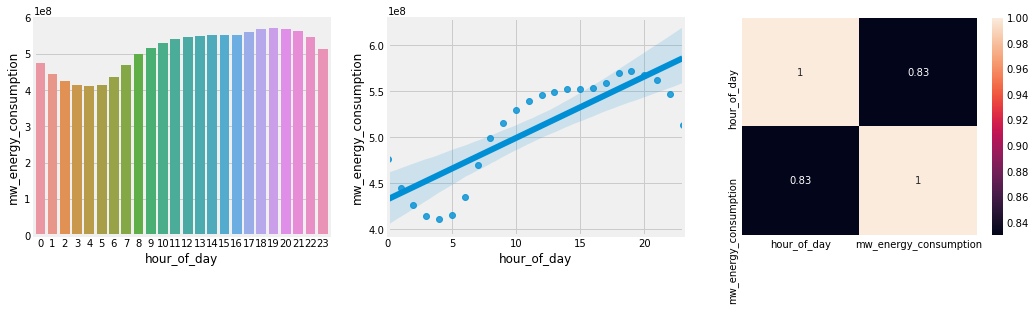

In [61]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
aux1 = df2[['hour_of_day', 'mw_energy_consumption']].groupby( 'hour_of_day' ).sum().reset_index()
sns.barplot( x='hour_of_day', y='mw_energy_consumption', data=aux1)

plt.subplot(1,3,2)
sns.regplot( x='hour_of_day', y='mw_energy_consumption', data=aux1 )

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

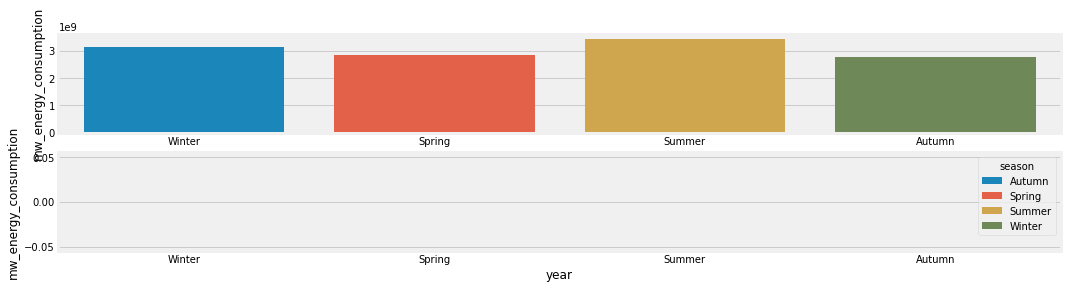

In [62]:
plt.figure(figsize=(16,4))

aux1 = df2[['season', 'mw_energy_consumption']].groupby( 'season' ).sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='season', y='mw_energy_consumption', data=aux1, order=['Winter', 'Spring', 'Summer', 'Autumn'] )

aux2 = df2[['year', 'season', 'mw_energy_consumption']].groupby( ['year', 'season'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='mw_energy_consumption', hue='season', data=aux2, order=['Winter', 'Spring', 'Summer', 'Autumn'] );

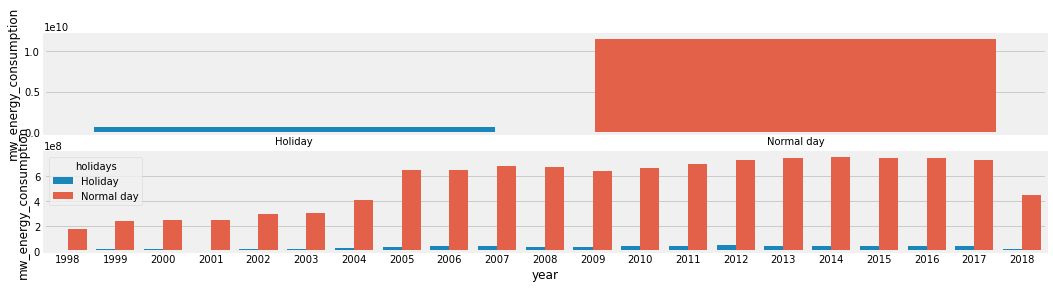

In [63]:
plt.figure(figsize=(16,4))
aux1 = df2[['holidays', 'mw_energy_consumption']].groupby( 'holidays' ).sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='holidays', y='mw_energy_consumption', data=aux1 )

aux2 = df2[['year', 'holidays', 'mw_energy_consumption']].groupby( ['year', 'holidays'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='mw_energy_consumption', hue='holidays', data=aux2 );

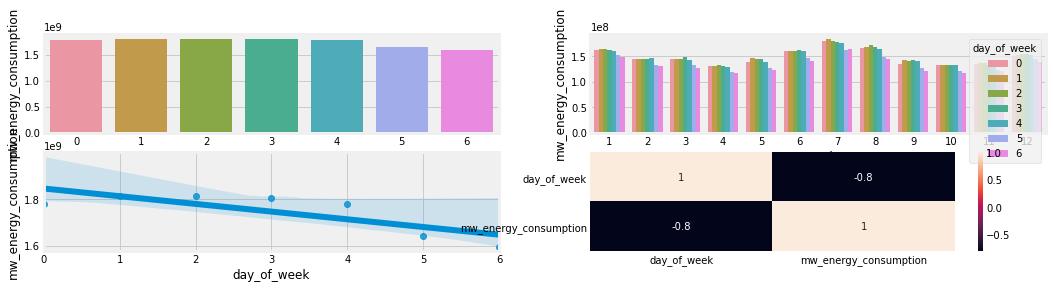

In [64]:
plt.figure(figsize=(16,4))
plt.subplot( 2, 2, 1)
aux1 = df2[['day_of_week', 'mw_energy_consumption']].groupby( 'day_of_week' ).sum().reset_index()
sns.barplot( x='day_of_week', y='mw_energy_consumption', data=aux1)

aux2 = df2[['month', 'day_of_week', 'mw_energy_consumption']].groupby( ['month', 'day_of_week'] ).sum().reset_index()
plt.subplot( 2, 2, 2 )
sns.barplot( x='month', y='mw_energy_consumption', hue='day_of_week', data=aux2 );

plt.subplot(2, 2, 3)
sns.regplot( x='day_of_week', y='mw_energy_consumption', data=aux1 )

plt.subplot(2, 2, 4)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );


<AxesSubplot:>

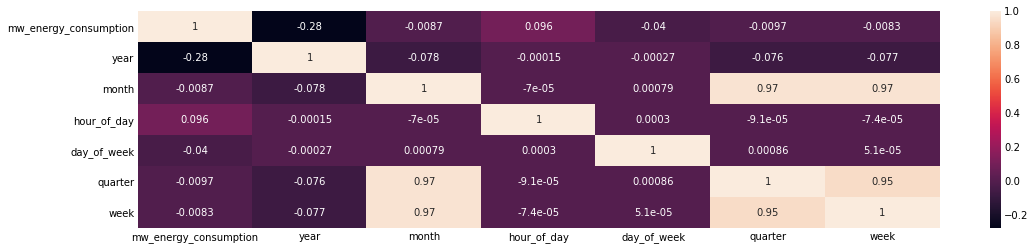

In [65]:
plt.figure(figsize=(16,4))
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True )

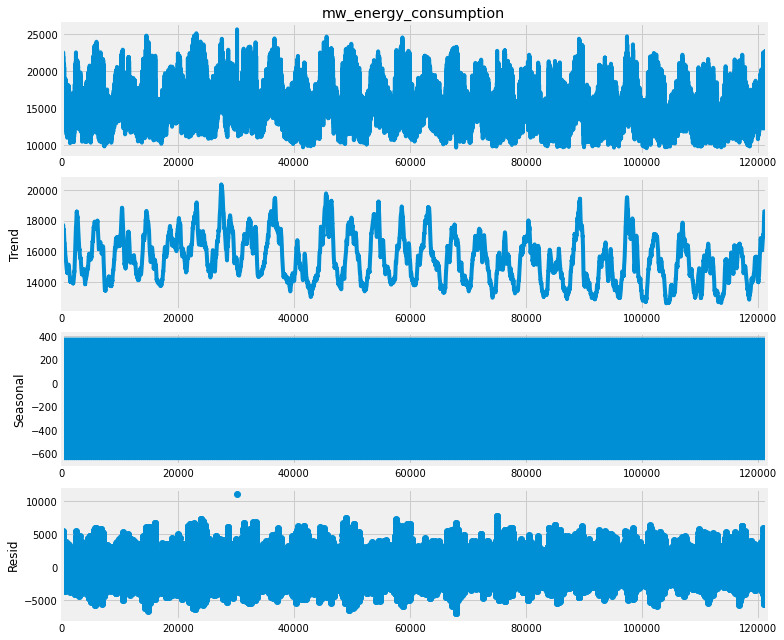

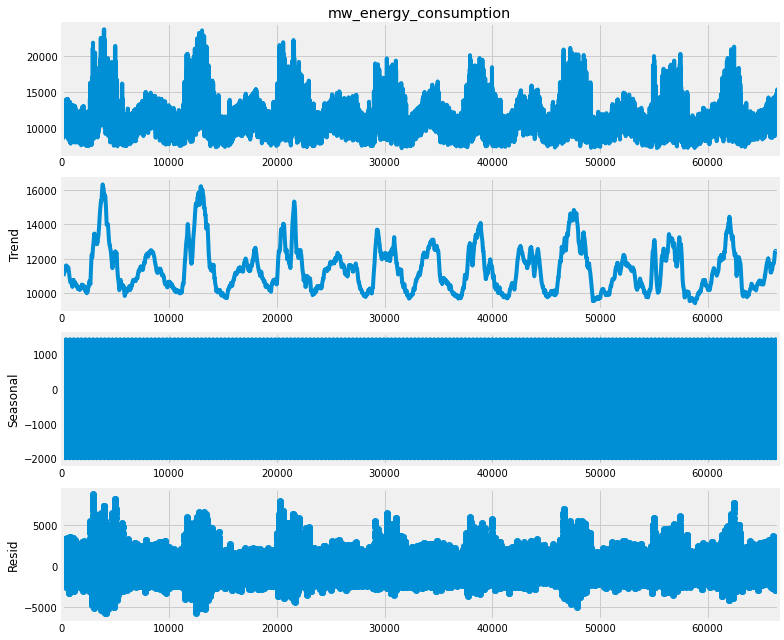

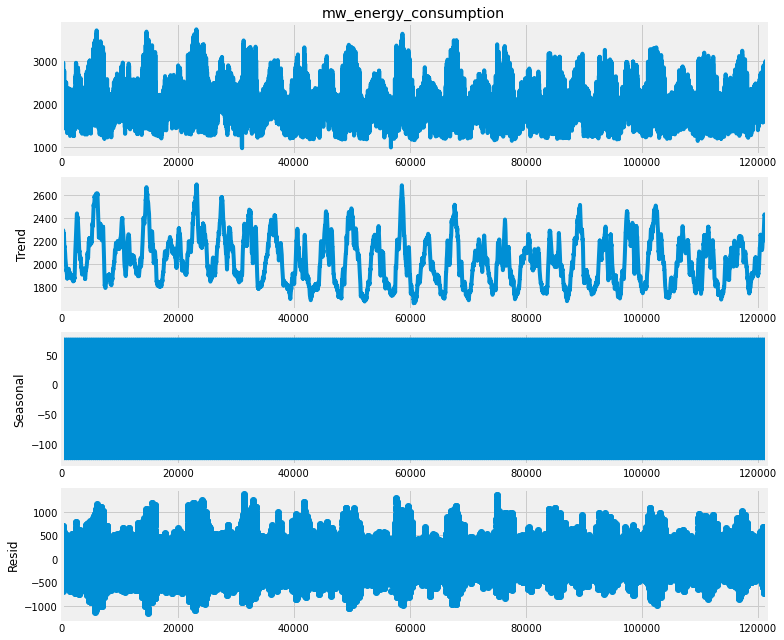

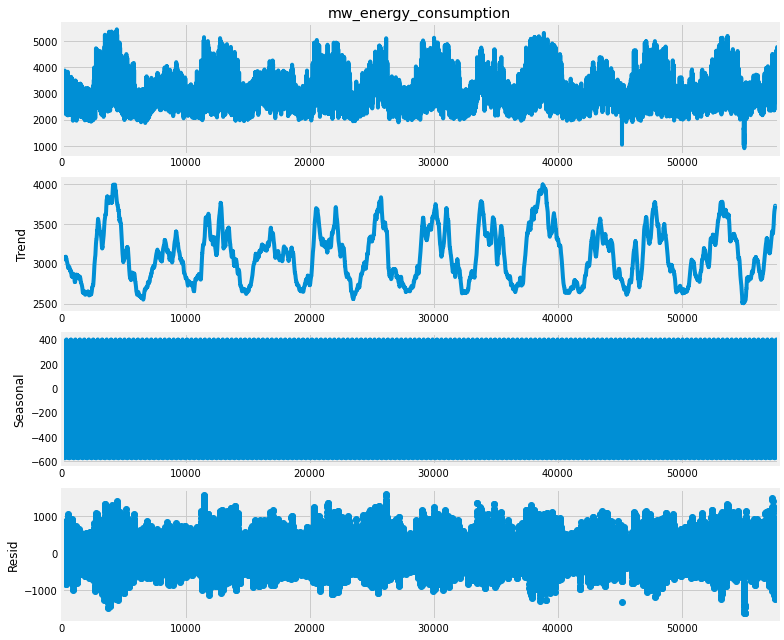

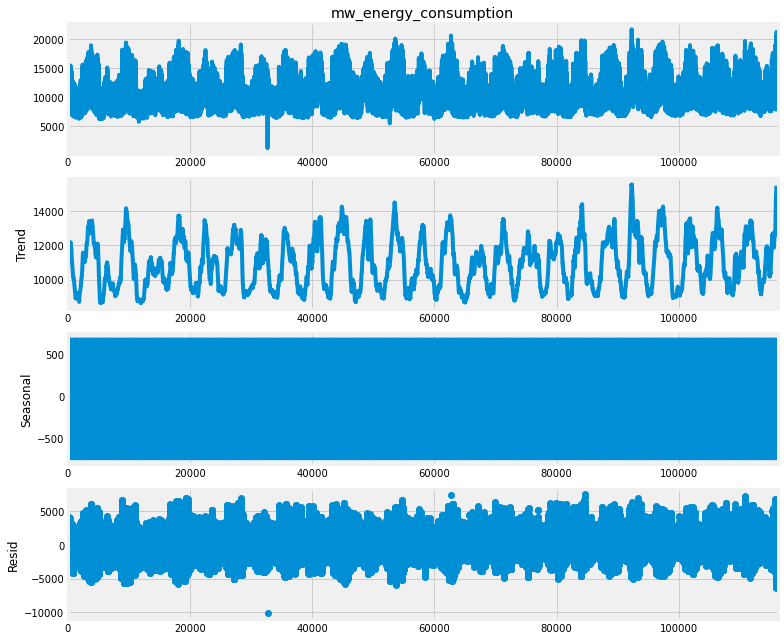

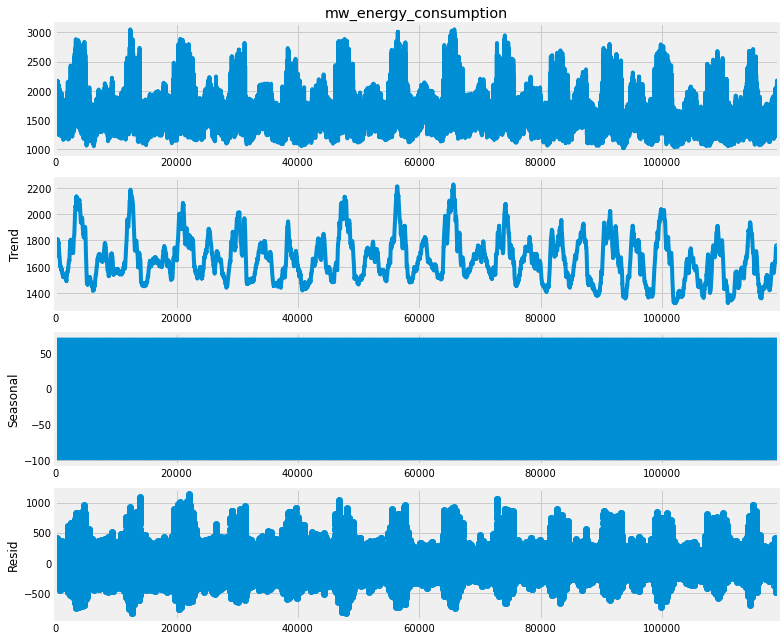

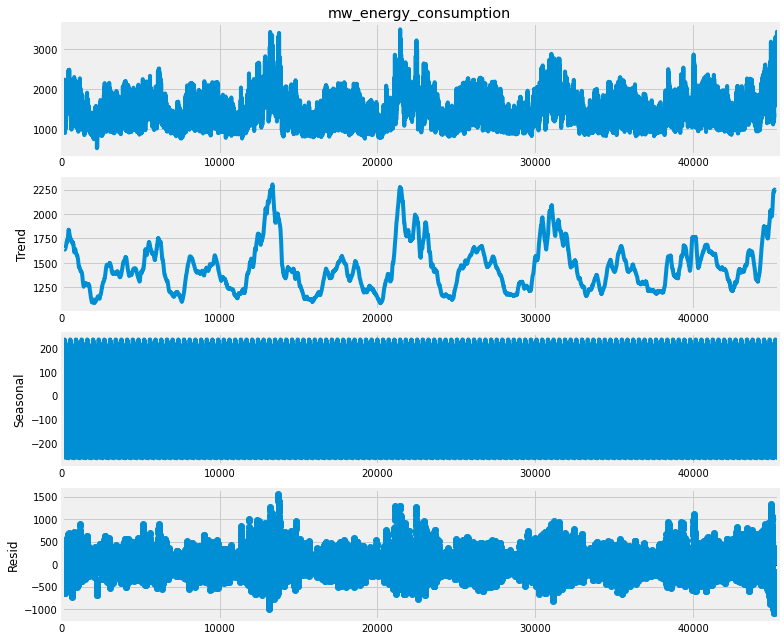

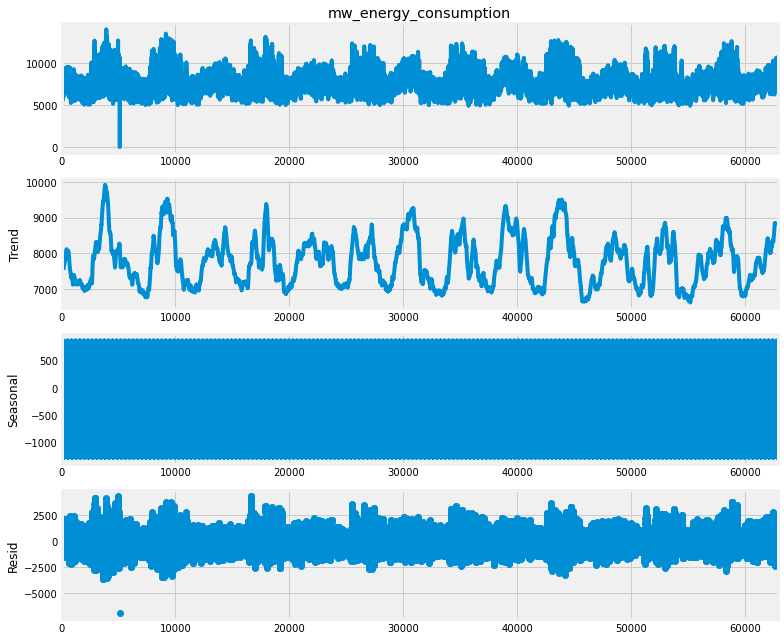

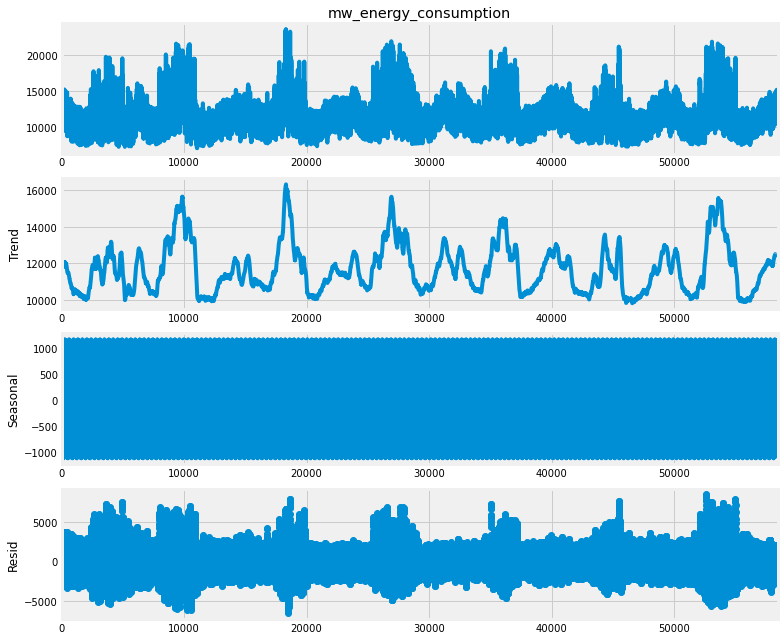

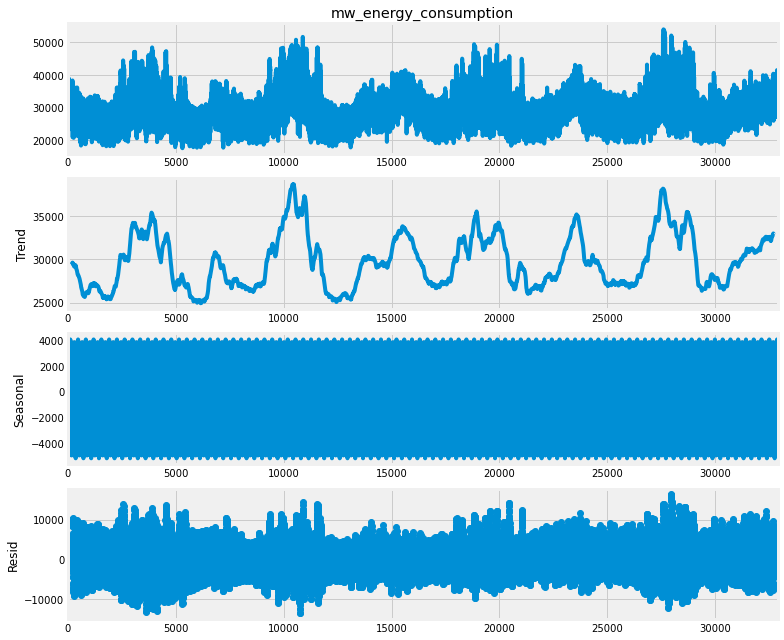

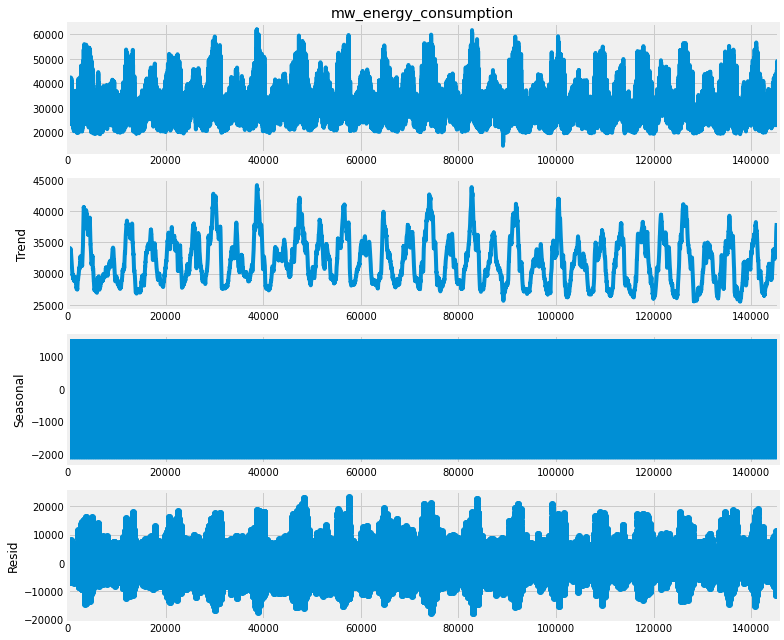

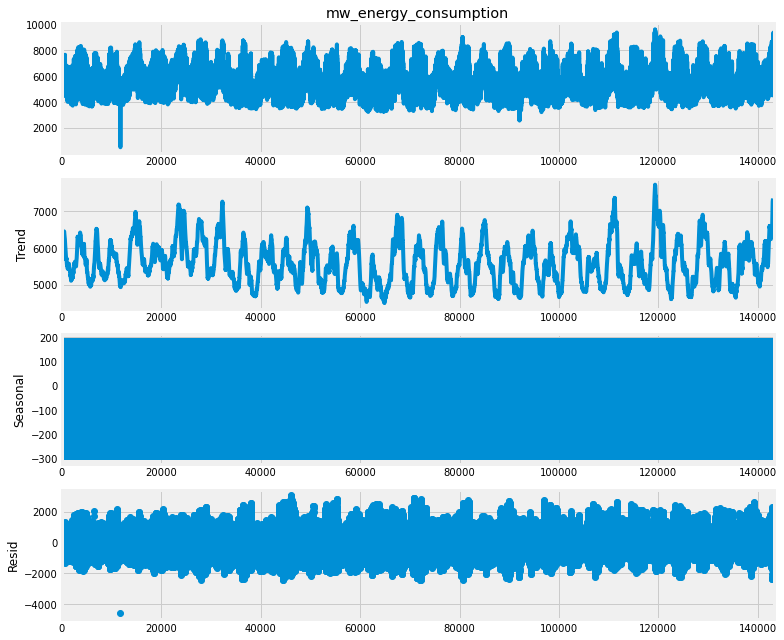

In [29]:
companies = df2.electric_company.unique()
for company in companies:
    rcParams['figure.figsize'] = 11, 9
    decomposed_df= sm.tsa.seasonal_decompose(df2[df2['electric_company']==company]['mw_energy_consumption'],freq=360) # The frequncy is annual
    figure = decomposed_df.plot()
    plt.show()